In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv("clean_ambito_2022_05_02_articles.csv")
df.head(2)


,uid,body,title,url,newspaper_uid,host,n_tokens_title,n_tokens_body
0,50b07d217ccc0deb253f0e48e2ebb3e4,Por Carlos Burgueño cburgueno@ambito.com...,"Alberto Fernández y Guzmán esperan, confiados,...",https://www.ambito.com/economia/fmi/alberto-fe...,ambito,www.ambito.com,8,119
1,c33d8413edce443c04ff12a41394c801,Los teléfonos móviles del presidente de Espa...,España denuncia que el teléfono de Pedro Sánch...,https://www.ambito.com/mundo/pedro-sanchez/esp...,ambito,www.ambito.com,9,23


### A word cloud is a data visualisation technique that shows the most used words in large font and the less used words in small font: 

1.- Title word cloud

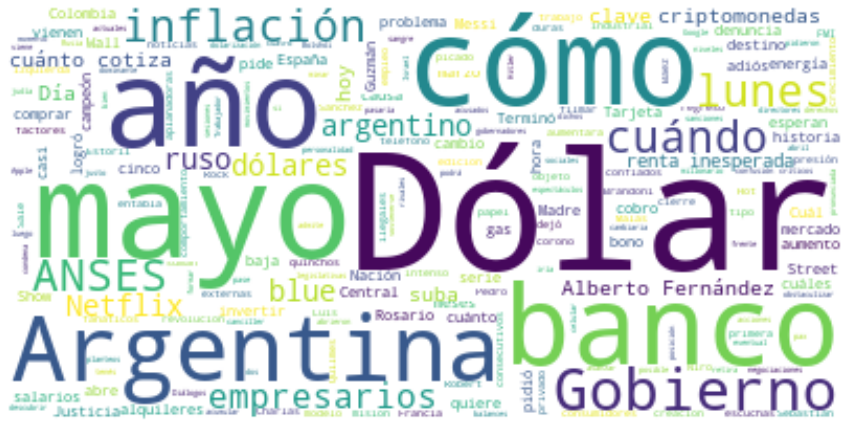

In [4]:
stopword=set(stopwords.words('spanish'))
text = " ".join(i for i in df.title)
stopwords = set(stopword)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2.- Body word cloud

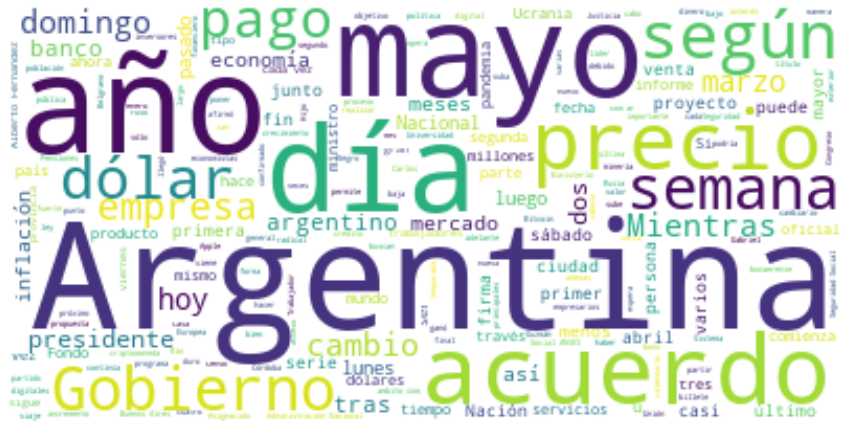

In [5]:
text = " ".join(i for i in df.body)
stopwords = set(stopword)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment analysis of the body of the newspaper notes

In [6]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\C4tri3l\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
def sent_an(data):
    data["Positive_body"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
    data["Negative_body"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
    data["Neutral_body"] = [sentiments.polarity_scores(i)["neu"] for i in data["body"]]
    data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["body"]]

    return data.head()

In [8]:
sentiment_analysis_body = sent_an(df)
sentiment_analysis_body

,uid,body,title,url,newspaper_uid,host,n_tokens_title,n_tokens_body,Positive_body,Negative_body,Neutral_body,Compound
0,50b07d217ccc0deb253f0e48e2ebb3e4,Por Carlos Burgueño cburgueno@ambito.com...,"Alberto Fernández y Guzmán esperan, confiados,...",https://www.ambito.com/economia/fmi/alberto-fe...,ambito,www.ambito.com,8,119,0.0,0.018,0.982,-0.5267
1,c33d8413edce443c04ff12a41394c801,Los teléfonos móviles del presidente de Espa...,España denuncia que el teléfono de Pedro Sánch...,https://www.ambito.com/mundo/pedro-sanchez/esp...,ambito,www.ambito.com,9,23,0.0,0.000,1.000,0.0000
2,3981bf3ea873cf806fb20d919b6a0692,Por Rocío Robledo La forma obsoleta y t...,"300 años sin cambios: ""adiós"" al modelo de tra...",https://www.ambito.com/opiniones/empleo/300-an...,ambito,www.ambito.com,8,47,0.0,0.000,1.000,0.0000
3,61a17422711347bad2655de210a78f2a,Netflix continúa modificando sus valores en...,Malas noticias para los fanáticos de Netflix: ...,https://www.ambito.com/economia/netflix/malas-...,ambito,www.ambito.com,5,18,0.0,0.000,1.000,0.0000
4,1c011408ef93bb1b91b3829f80acf324,El actor estadounidense Robert De Niro llegó...,Robert De Niro ya está en Argentina para filma...,https://www.ambito.com/espectaculos/serie/robe...,ambito,www.ambito.com,6,22,0.0,0.000,1.000,0.0000


In [11]:
def score(data):
    score = sentiment_analysis_body["Compound"].values
    sentiment = []
    for i in score:
        if i >= 0.05 :
            sentiment.append('Positive')
        elif i <= -0.05 :
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
    sentiment_analysis_body["Sentiment"] = sentiment
    return sentiment_analysis_body.head()

In [12]:
df = score(sentiment_analysis_body)
df

,uid,body,title,url,newspaper_uid,host,n_tokens_title,n_tokens_body,Positive_body,Negative_body,Neutral_body,Compound,Sentiment
0,50b07d217ccc0deb253f0e48e2ebb3e4,Por Carlos Burgueño cburgueno@ambito.com...,"Alberto Fernández y Guzmán esperan, confiados,...",https://www.ambito.com/economia/fmi/alberto-fe...,ambito,www.ambito.com,8,119,0.0,0.018,0.982,-0.5267,Negative
1,c33d8413edce443c04ff12a41394c801,Los teléfonos móviles del presidente de Espa...,España denuncia que el teléfono de Pedro Sánch...,https://www.ambito.com/mundo/pedro-sanchez/esp...,ambito,www.ambito.com,9,23,0.0,0.000,1.000,0.0000,Neutral
2,3981bf3ea873cf806fb20d919b6a0692,Por Rocío Robledo La forma obsoleta y t...,"300 años sin cambios: ""adiós"" al modelo de tra...",https://www.ambito.com/opiniones/empleo/300-an...,ambito,www.ambito.com,8,47,0.0,0.000,1.000,0.0000,Neutral
3,61a17422711347bad2655de210a78f2a,Netflix continúa modificando sus valores en...,Malas noticias para los fanáticos de Netflix: ...,https://www.ambito.com/economia/netflix/malas-...,ambito,www.ambito.com,5,18,0.0,0.000,1.000,0.0000,Neutral
4,1c011408ef93bb1b91b3829f80acf324,El actor estadounidense Robert De Niro llegó...,Robert De Niro ya está en Argentina para filma...,https://www.ambito.com/espectaculos/serie/robe...,ambito,www.ambito.com,6,22,0.0,0.000,1.000,0.0000,Neutral


In [13]:
print(sentiment_analysis_body["Sentiment"].value_counts())

Neutral     4
Negative    1
Name: Sentiment, dtype: int64


In [177]:
def sent_an(data):
    data["Positive_body"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
    data["Negative_body"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
    data["Neutral_body"] = [sentiments.polarity_scores(i)["neu"] for i in data["body"]]
    data = data[["body", "Positive_body", "Negative_body", "Neutral_body"]]
    return data

In [178]:
sentiment_analysis_body = sent_an(df)
sentiment_analysis_body

,body,Positive_body,Negative_body,Neutral_body
0,Por Carlos Burgueño cburgueno@ambito.com...,0.0,0.018,0.982
1,Los teléfonos móviles del presidente de Espa...,0.0,0.000,1.000
2,Por Rocío Robledo La forma obsoleta y t...,0.0,0.000,1.000
3,Netflix continúa modificando sus valores en...,0.0,0.000,1.000
4,El actor estadounidense Robert De Niro llegó...,0.0,0.000,1.000
...,...,...,...,...
101,"Electrodomésticos, celulares, muebles, indu...",0.0,0.128,0.872
102,El mundo audiovisual iberoamericano concretó...,0.0,0.000,1.000
103,Por Ignacio Ayanz La invasión de Rusia ...,0.0,0.000,1.000
104,El diputado nacional del Frente de Todos y p...,0.0,0.000,1.000


In [14]:
def sum_data(dt):
    print(f"Sum_ {dt}:")
    return str(sum(sentiment_analysis_body[dt]))

In [15]:
Sum_Positive_body = sum_data("Positive_body")
Sum_Positive_body

Sum_ Positive_body:


'0.0'

In [16]:
Sum_Negative_body = sum_data("Negative_body")
Sum_Negative_body

Sum_ Negative_body:


'0.018'

In [17]:
Sum_Neutral_body = sum_data("Neutral_body")
Sum_Neutral_body

Sum_ Neutral_body:


'4.982'

In [ ]:
sentiment_analysis_body.to_csv("Sentiment_analysis.csv")

### The total of positives and negatives is much lower than Neutral, so we can say that the content of the journalistic notes of the newspaper specialized in economy and finance of Argentina, has neutral characteristics and opinions of journalists who try to be neutral.